In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
import os

In [2]:
# Function to load a pre-normalized transition matrix
def load_matrix(file_path, reference_index=None):
    """
    Load a pre-normalized transition matrix.

    Args:
    - file_path (str): Path to the normalized matrix file.
    - reference_index (pd.Index, optional): Reference order of categories.

    Returns:
    - pd.DataFrame: Pre-normalized matrix.
    """
    # Load the matrix
    matrix = pd.read_csv(file_path, index_col=0)

    # Reindex to ensure consistent category order
    if reference_index is not None:
        matrix = matrix.reindex(index=reference_index, columns=reference_index).fillna(0)

    return matrix

# Paths to the pre-aggregated general matrices
general_matrix_combined_path_exp1 = "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/final_transition_matrix_combined.csv"
general_matrix_combined_path_exp2 = "/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/final_transition_matrix_combined.csv"
general_matrix_faces_path_exp1 = "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/final_transition_matrix_faces.csv"
general_matrix_faces_path_exp2 = "/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/final_transition_matrix_faces.csv"

# Screenshot path
screenshot_path = "/Users/tracysanchezpacheco/Library/CloudStorage/OneDrive-Personal/PhD/Creation/Entropy_Gaze_transition.png"



Figure saved to: /Volumes/TwoTeras/0_Experiment_1/Entropy_Results/combined_transition_matrices_screenshot_top.png


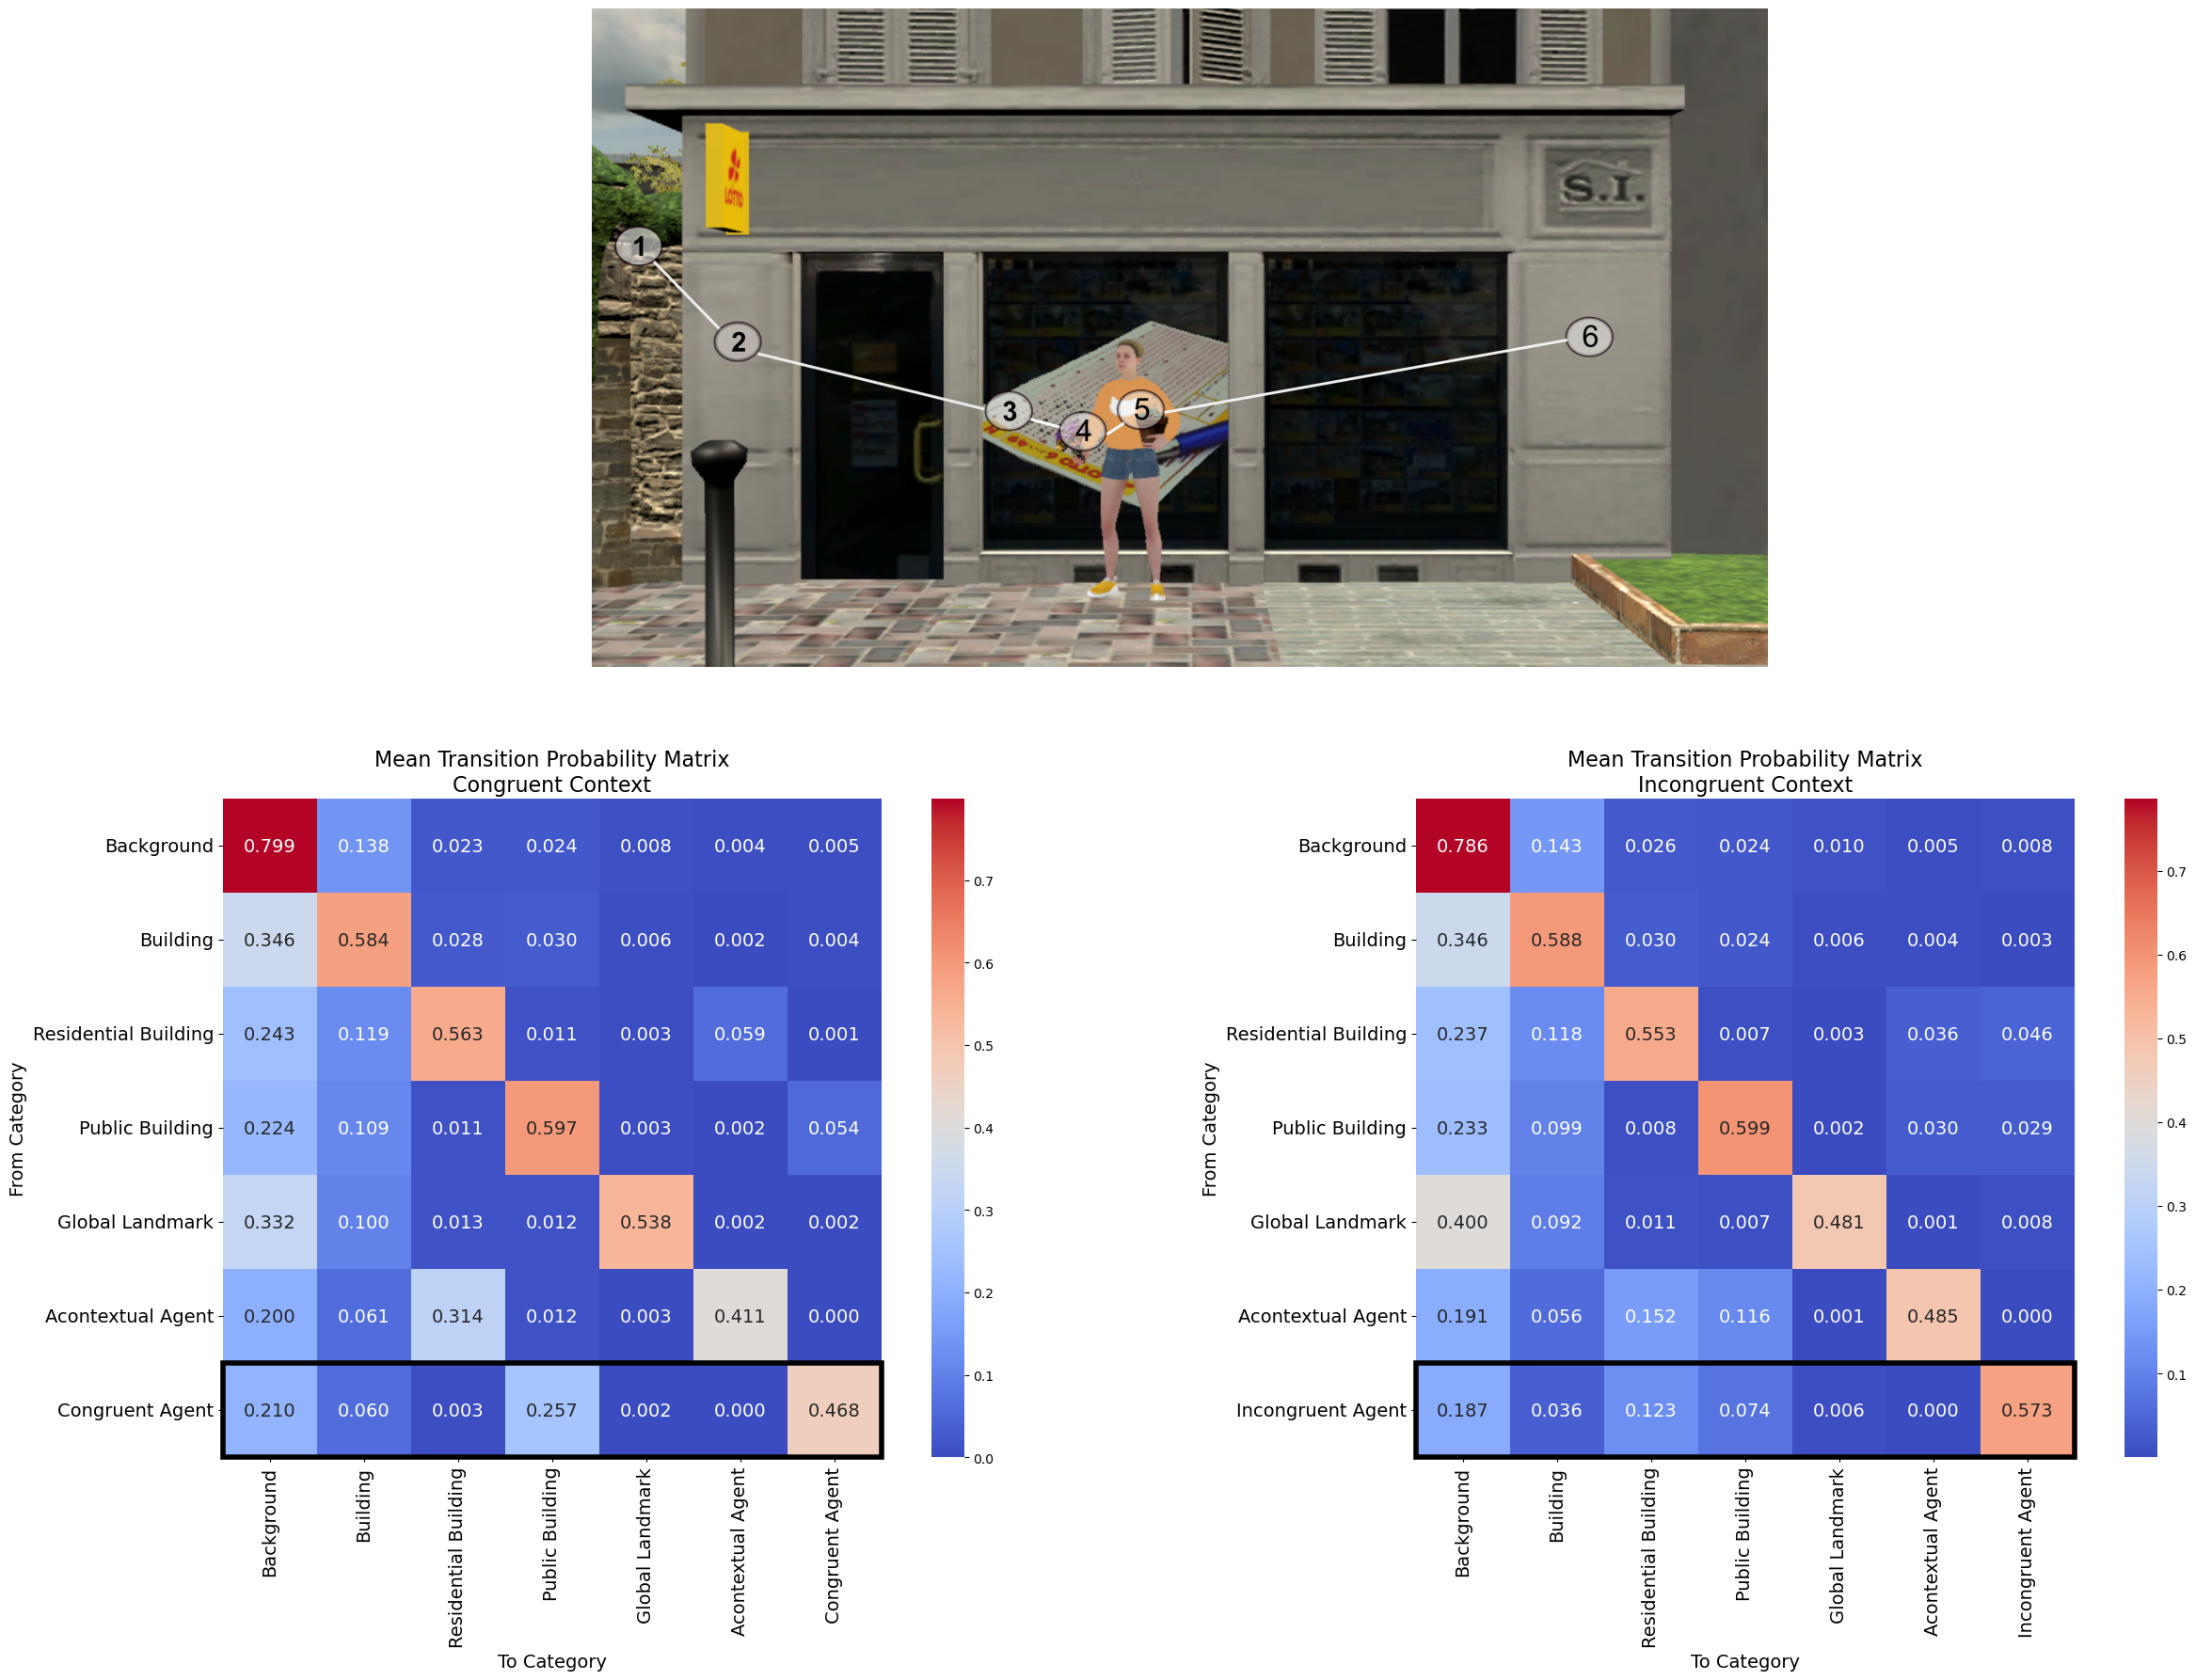

Figure saved to: /Volumes/TwoTeras/0_Experiment_1/Entropy_Results/faces_transition_matrices_screenshot_top.png


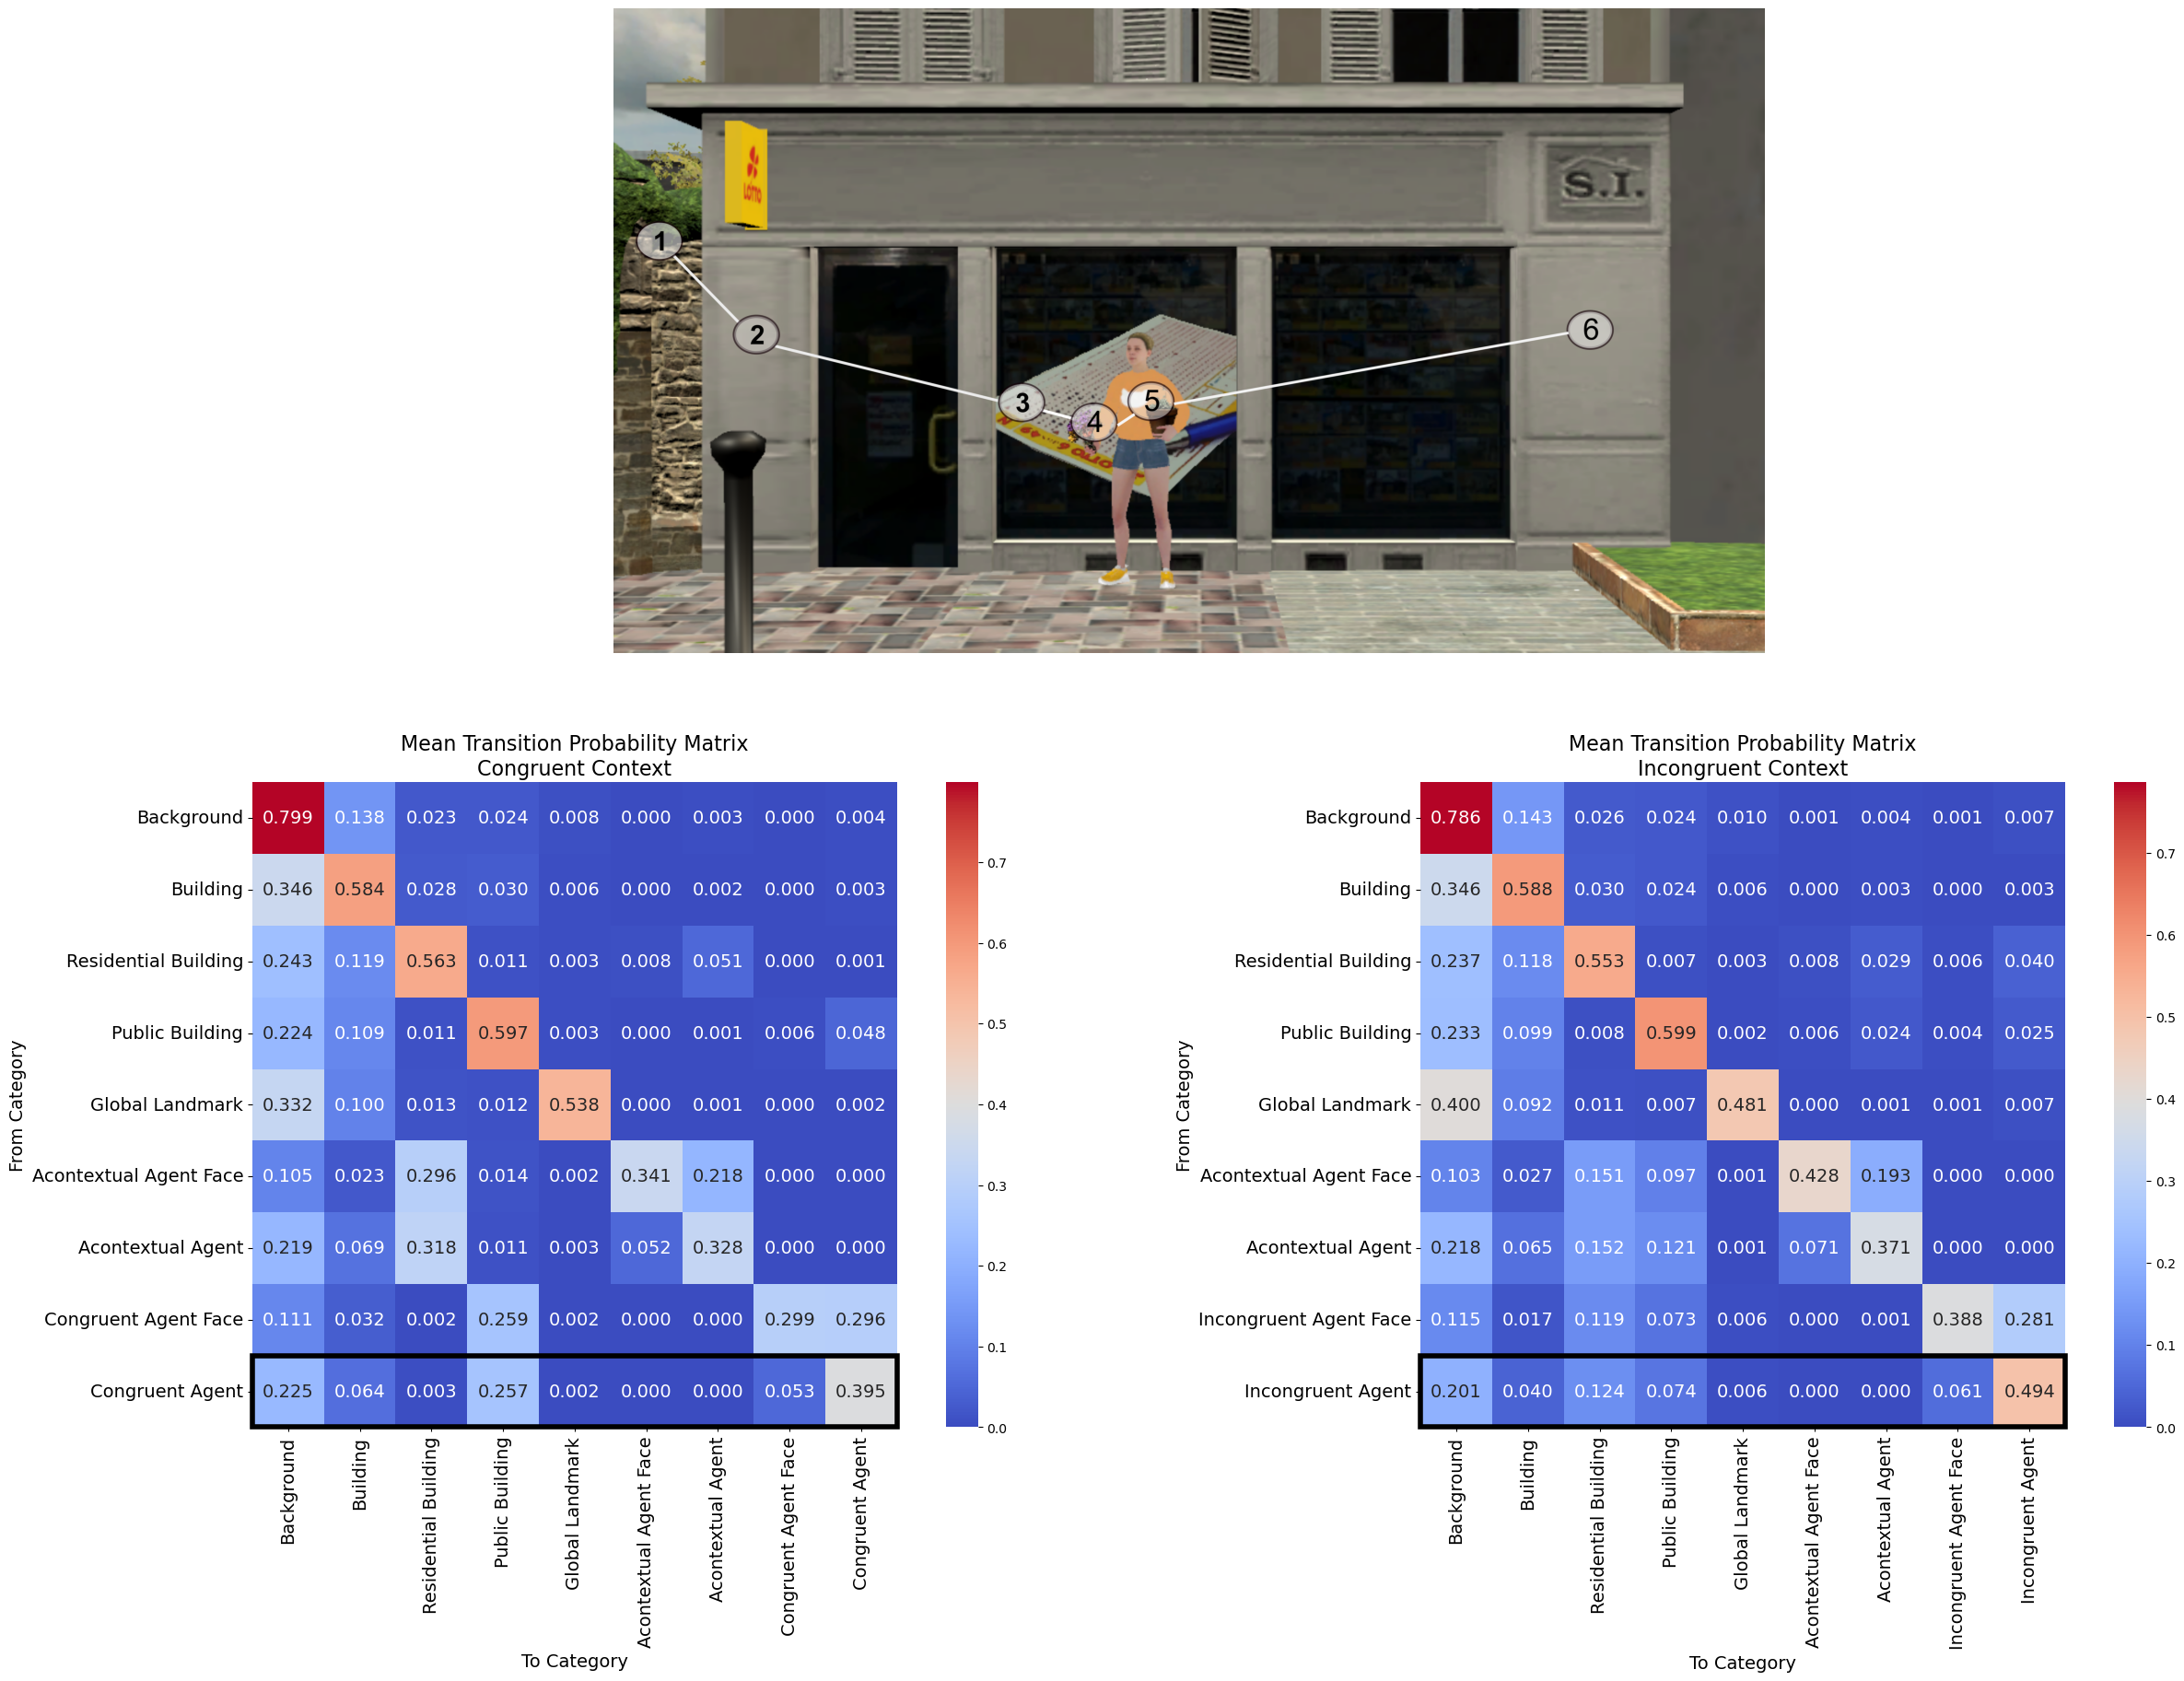

In [3]:
# Desired order of categories for the heatmaps
original_order_combined = [
    "Background", "Building", "TaskBuilding_Residential", "TaskBuilding_Public",
    "Global_Landmark", "Passive_Agent", "Active_Agent"
]
original_order_faces = [
    "Background", "Building", "TaskBuilding_Residential", "TaskBuilding_Public",
    "Global_Landmark", "Passive_Agent_Face", "Passive_Agent", "Active_Agent_Face", "Active_Agent"
]

# Function to adjust labels for visualization
def adjust_label(label, context="Congruent"):
    label = label.replace("_", " ")
    if "TaskBuilding" in label:
        label = label.replace("TaskBuilding", "") + " Building"
    if "Active" in label:
        label = label.replace("Active", context)
    if "Passive" in label:
        label = label.replace("Passive", "Acontextual")
    return label.strip()

# Plotting function
def create_transition_matrix_figure(general_matrix_exp1_path, general_matrix_exp2_path, category_order, output_path, screenshot_path, title_suffix):
    """
    Create a transition matrix visualization.

    Args:
    - general_matrix_exp1_path (str): Path to the first transition matrix.
    - general_matrix_exp2_path (str): Path to the second transition matrix.
    - category_order (list): Desired category order for heatmaps.
    - output_path (str): Path to save the final figure.
    - screenshot_path (str): Path to the screenshot image.
    - title_suffix (str): Suffix for heatmap titles.
    """
    # Load the matrices
    general_matrix_exp1 = load_matrix(general_matrix_exp1_path)
    general_matrix_exp2 = load_matrix(general_matrix_exp2_path, reference_index=general_matrix_exp1.index)

    # Reindex matrices using the specified order
    general_matrix_exp1 = general_matrix_exp1.reindex(index=category_order, columns=category_order).fillna(0)
    general_matrix_exp2 = general_matrix_exp2.reindex(index=category_order, columns=category_order).fillna(0)

    # Adjust labels for plotting
    plot_labels_congruent = [adjust_label(label, context="Congruent") for label in category_order]
    plot_labels_incongruent = [adjust_label(label, context="Incongruent") for label in category_order]
    plot_labels_incongruent = [adjust_label(label, context="Incongruent") for label in category_order]

    # Load the screenshot
    screenshot_img = mpimg.imread(screenshot_path)

    # Create a grid layout
    fig = plt.figure(figsize=(30, 20))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1], hspace=0.2, wspace=0.2)

    # Top row: Screenshot
    ax0 = fig.add_subplot(gs[0, :])
    ax0.imshow(screenshot_img)
    ax0.axis('off')  # Hide axes for the screenshot
   # ax0.set_title('Gaze Transition Example', fontsize=20)

    # Bottom row, left: First heatmap (Congruent)
    ax1 = fig.add_subplot(gs[1, 0])
    sns.heatmap(general_matrix_exp1, annot=True, fmt=".3f", annot_kws={"size": 14},
                cmap="coolwarm", cbar=True, square=True,
                xticklabels=plot_labels_congruent, yticklabels=plot_labels_congruent, ax=ax1)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    ax1.set_title(f'Mean Transition Probability Matrix\nCongruent Context', fontsize=16)
    ax1.set_xlabel('To Category', fontsize=14)
    ax1.set_ylabel('From Category', fontsize=14)

    # Highlight the last two rows of the first heatmap
    row_start = len(plot_labels_congruent) - 1
    ax1.add_patch(plt.Rectangle(
        (0, row_start), len(plot_labels_congruent), 1,  # Highlight the last one row
        fill=False, edgecolor='black', linewidth=4, clip_on=False
    ))

    # Bottom row, right: Second heatmap (Incongruent)
    ax2 = fig.add_subplot(gs[1, 1])
    sns.heatmap(general_matrix_exp2, annot=True, fmt=".3f", annot_kws={"size": 14},
                cmap="coolwarm", cbar=True, square=True,
                xticklabels=plot_labels_incongruent, yticklabels=plot_labels_incongruent, ax=ax2)
    ax2.tick_params(axis='x', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)
    ax2.set_title(f'Mean Transition Probability Matrix\nIncongruent Context', fontsize=16)
    ax2.set_xlabel('To Category', fontsize=14)
    ax2.set_ylabel('From Category', fontsize=14)

    # Highlight the last two rows of the second heatmap
    ax2.add_patch(plt.Rectangle(
        (0, row_start), len(plot_labels_incongruent),1,  # Highlight the last two rows
        fill=False, edgecolor='black', linewidth=4, clip_on=False
    ))

    # Save the figure
    plt.savefig(output_path, dpi=900, bbox_inches='tight')
    print(f"Figure saved to: {output_path}")
    plt.show()

# Create figures for combined and face-separated matrices
create_transition_matrix_figure(
    general_matrix_combined_path_exp1,
    general_matrix_combined_path_exp2,
    original_order_combined,
    "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/combined_transition_matrices_screenshot_top.png",
    screenshot_path,
    "Combined"
)

create_transition_matrix_figure(
    general_matrix_faces_path_exp1,
    general_matrix_faces_path_exp2,
    original_order_faces,
    "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/faces_transition_matrices_screenshot_top.png",
    screenshot_path,
    "Face-Separated"
)


Figure saved to: /Volumes/TwoTeras/0_Experiment_1/Entropy_Results/combined_transition_matrices_screenshot_top.png


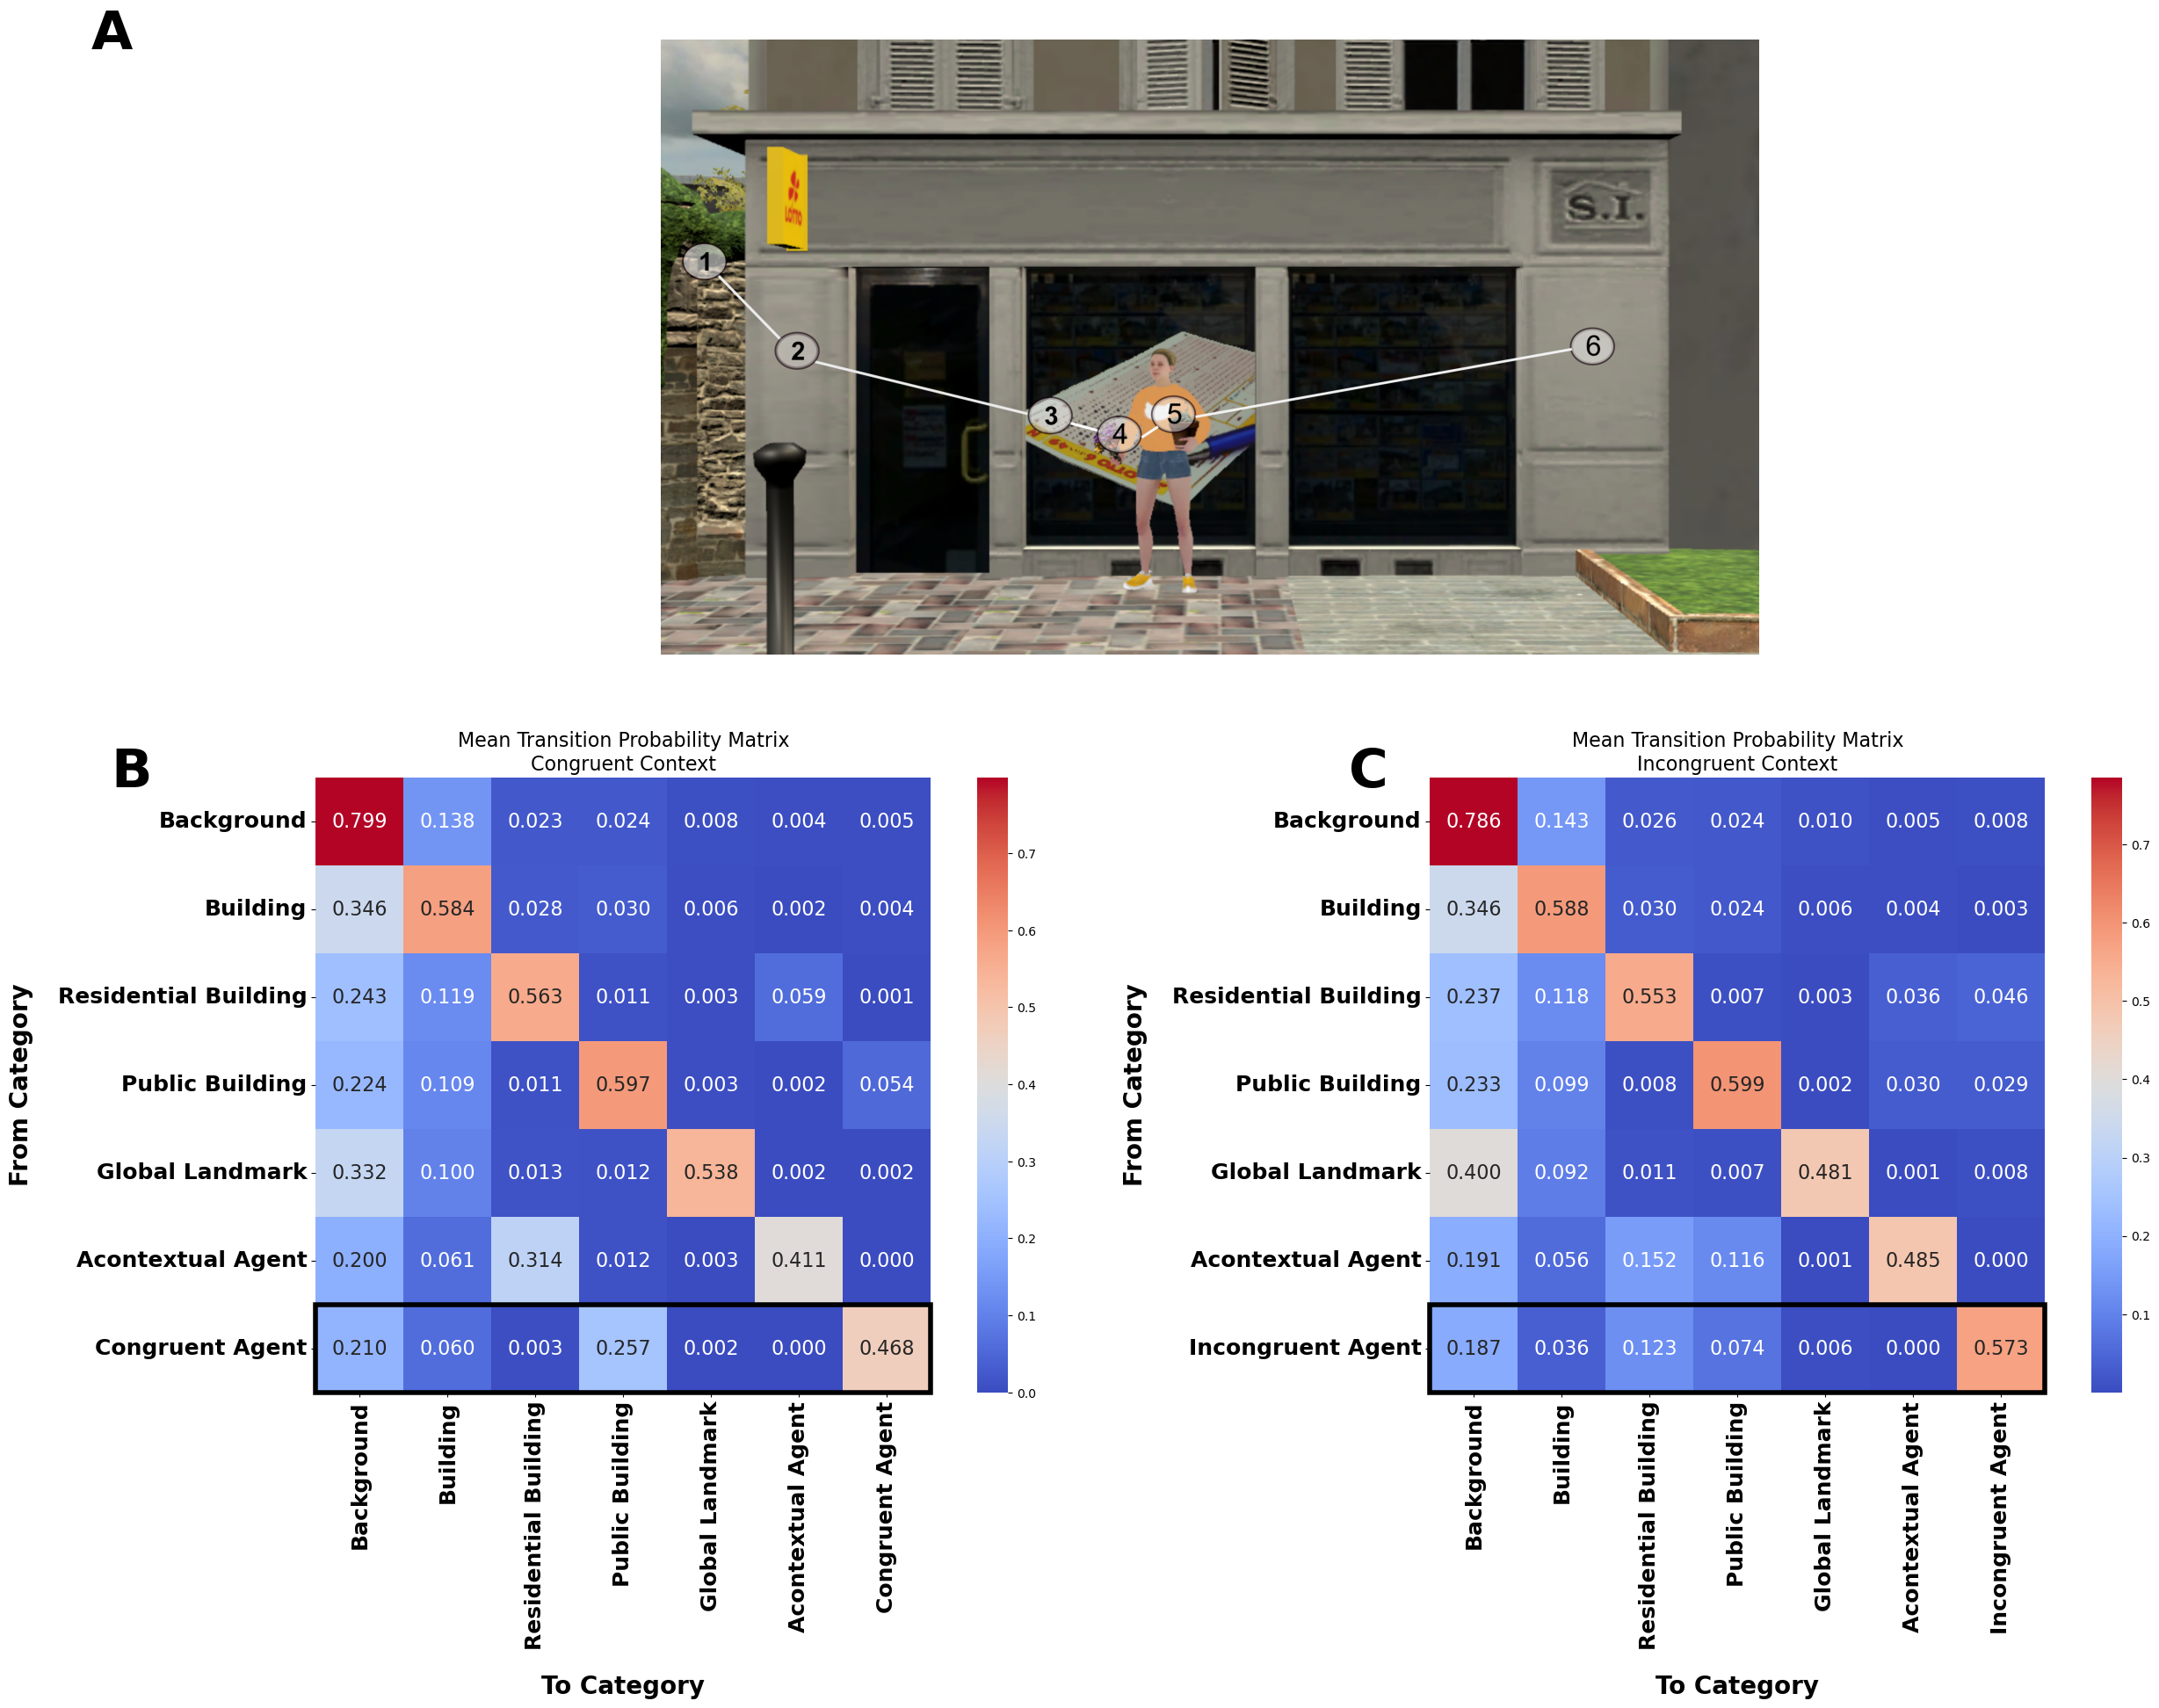

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.gridspec as gridspec

# Plotting function
def create_transition_matrix_figure(general_matrix_exp1_path, general_matrix_exp2_path, category_order, output_path, screenshot_path):
    """
    Create a transition matrix visualization.

    Args:
    - general_matrix_exp1_path (str): Path to the first transition matrix.
    - general_matrix_exp2_path (str): Path to the second transition matrix.
    - category_order (list): Desired category order for heatmaps.
    - output_path (str): Path to save the final figure.
    - screenshot_path (str): Path to the screenshot image.
    """

    # Load the screenshot
    screenshot_img = mpimg.imread(screenshot_path)

    # Load the matrices
    general_matrix_exp1 = load_matrix(general_matrix_exp1_path)
    general_matrix_exp2 = load_matrix(general_matrix_exp2_path, reference_index=general_matrix_exp1.index)

    # Reindex matrices using the specified order
    general_matrix_exp1 = general_matrix_exp1.reindex(index=category_order, columns=category_order).fillna(0)
    general_matrix_exp2 = general_matrix_exp2.reindex(index=category_order, columns=category_order).fillna(0)

    # Adjust labels for plotting
    plot_labels_congruent = [adjust_label(label, context="Congruent") for label in category_order]
    plot_labels_incongruent = [adjust_label(label, context="Incongruent") for label in category_order]

    # Create a grid layout
    fig = plt.figure(figsize=(30, 20))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1], hspace=0.2, wspace=0.2)

    # Top row: Screenshot
    ax0 = fig.add_subplot(gs[0, :])
    ax0.imshow(screenshot_img)
    ax0.axis('off')  # Hide axes for the screenshot

    # **Add label "A" (aligned with B vertically)**
    ax0.text(-0.5, 1.05, 'A', transform=ax0.transAxes, fontsize=44, fontweight='bold', ha='center', va='top')

    # Bottom row, left: First heatmap (Congruent)
    ax1 = fig.add_subplot(gs[1, 0])
    sns.heatmap(general_matrix_exp1, annot=True, fmt=".3f", annot_kws={"size": 16},
                cmap="coolwarm", cbar=True, square=True,
                xticklabels=plot_labels_congruent, yticklabels=plot_labels_congruent, ax=ax1)

    # **Make all tick labels bold**
    ax1.set_xticklabels(ax1.get_xticklabels(), fontdict={'fontsize': 18, 'fontweight': 'bold'})
    ax1.set_yticklabels(ax1.get_yticklabels(), fontdict={'fontsize': 18, 'fontweight': 'bold'})

    # **Make title, axis labels bold and add labelpad for spacing**
    ax1.set_title(f'Mean Transition Probability Matrix\nCongruent Context', fontsize=16)
    ax1.set_xlabel('To Category', fontsize=20, fontweight='bold', labelpad=20)  # <-- Increased spacing
    ax1.set_ylabel('From Category', fontsize=20, fontweight='bold', labelpad=20)  # <-- Increased spacing

    # **Add label "B" (aligned with A vertically)**
    ax1.text(-0.3, 1.05, 'B', transform=ax1.transAxes, fontsize=44, fontweight='bold', ha='center', va='top')

    # **Highlight the last row of the first heatmap**
    row_start = len(plot_labels_congruent) - 1
    ax1.add_patch(plt.Rectangle(
        (0, row_start), len(plot_labels_congruent), 1,  
        fill=False, edgecolor='black', linewidth=4, clip_on=False
    ))

    # Bottom row, right: Second heatmap (Incongruent)
    ax2 = fig.add_subplot(gs[1, 1])
    sns.heatmap(general_matrix_exp2, annot=True, fmt=".3f", annot_kws={"size": 16},
                cmap="coolwarm", cbar=True, square=True,
                xticklabels=plot_labels_incongruent, yticklabels=plot_labels_incongruent, ax=ax2)

    # **Make all tick labels bold**
    ax2.set_xticklabels(ax2.get_xticklabels(), fontdict={'fontsize': 18, 'fontweight': 'bold'})
    ax2.set_yticklabels(ax2.get_yticklabels(), fontdict={'fontsize': 18, 'fontweight': 'bold'})

    # **Make title, axis labels bold and add labelpad for spacing**
    ax2.set_title(f'Mean Transition Probability Matrix\nIncongruent Context', fontsize=16)
    ax2.set_xlabel('To Category', fontsize=20, fontweight='bold', labelpad=20)  # <-- Increased spacing
    ax2.set_ylabel('From Category', fontsize=20, fontweight='bold', labelpad=20)  # <-- Increased spacing

    # **Add label "C" (aligned horizontally with B)**
    ax2.text(-0.1, 1.05, 'C', transform=ax2.transAxes, fontsize=44, fontweight='bold', ha='center', va='top')

    # **Highlight the last row of the second heatmap**
    row_start = len(plot_labels_incongruent) - 1
    ax2.add_patch(plt.Rectangle(
        (0, row_start), len(plot_labels_incongruent), 1,  
        fill=False, edgecolor='black', linewidth=4, clip_on=False
    ))

    # Save the figure
    plt.savefig(output_path, dpi=900, bbox_inches='tight')
    print(f"Figure saved to: {output_path}")
    plt.show()

# **Only plot for original_order_combined**
create_transition_matrix_figure(
    general_matrix_combined_path_exp1,
    general_matrix_combined_path_exp2,
    original_order_combined,
    "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/combined_transition_matrices_screenshot_top.png",
    screenshot_path
)


In [ ]:

# Plot the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(28, 12))

# Plot the first heatmap
sns.heatmap(general_matrix_exp1, annot=True, fmt=".3f", annot_kws={"size": 14},
            cmap="coolwarm", cbar=True, square=True,
            xticklabels=plot_labels_left, yticklabels=plot_labels_left, ax=axes[0])
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_title('Mean Transition Probability Matrix with Congruent Agents', fontsize=16)
axes[0].set_xlabel('To Category', fontsize=14)
axes[0].set_ylabel('From Category', fontsize=14)

# Add a rectangle to highlight the last two rows of the first heatmap
row_start = len(plot_labels_left) - 2
axes[0].add_patch(plt.Rectangle(
    (0, row_start), len(plot_labels_left), 2,
    fill=False, edgecolor='black', linewidth=4, clip_on=False))

# Plot the second heatmap
sns.heatmap(general_matrix_exp2, annot=True, fmt=".3f", annot_kws={"size": 14},
            cmap="coolwarm", cbar=True, square=True,
            xticklabels=plot_labels_right, yticklabels=plot_labels_right, ax=axes[1])
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].set_title('Mean Transition Probability Matrix with Incongruent Agents', fontsize=16)
axes[1].set_xlabel('To Category', fontsize=14)
axes[1].set_ylabel('From Category', fontsize=14)

# Add a rectangle to highlight the last two rows of the second heatmap
axes[1].add_patch(plt.Rectangle(
    (0, row_start), len(plot_labels_right), 2,
    fill=False, edgecolor='black', linewidth=4, clip_on=False))

# Save the figure
output_path = "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/mean_transition_matrices_paper.png"
plt.savefig(output_path, dpi=900, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import re  # Import regex module

def validate_and_fix_transition_matrices(path, repair=False):
    """
    Validates transition matrices and optionally repairs them by:
    1. Identifying rows that do not sum to 1.
    2. Identifying negative values.
    3. (Optional) Replacing invalid rows with an equal probability distribution.

    Args:
    - path (str): Path to the directory containing transition matrix CSV files.
    - repair (bool): Whether to attempt fixing invalid rows.

    Returns:
    - invalid_matrices (dict): Dictionary of invalid matrices with details.
    """
    matrix_files = glob.glob(os.path.join(path, "*.csv"))
    if not matrix_files:
        print(f"No matrix files found in {path}")
        return {}

    invalid_matrices = {}

    for file in matrix_files:
        file_name = os.path.basename(file)

        # Skip files that do not start with digits
        if not re.match(r"^\d", file_name):
            print(f"Skipping file '{file_name}' as it does not start with digits.")
            continue

        print(f"Validating: {file}")
        df = pd.read_csv(file, index_col=0)  # Load the matrix

        # Check for rows that do not sum to 1
        row_sums = df.sum(axis=1)
        invalid_rows = row_sums[~np.isclose(row_sums, 1)].index
        if not invalid_rows.empty:
            print(f"Rows in {file} that do not sum to 1:")
            for idx in invalid_rows:
                print(f"  Row '{idx}': sum = {row_sums[idx]}")
            
            # Record invalid matrix details
            invalid_matrices[file] = {
                'invalid_rows': {idx: row_sums[idx] for idx in invalid_rows}
            }

            # Optionally repair invalid rows
            if repair:
                for idx in invalid_rows:
                    if df.loc[idx].sum() == 0:
                        # Replace row with equal probabilities if it's all zeros
                        df.loc[idx] = 1 / len(df.columns)
                    else:
                        # Normalize rows that are slightly off
                        df.loc[idx] = df.loc[idx] / df.loc[idx].sum()

        # Check for negative values
        has_negative = (df < 0).any().any()
        if has_negative:
            print(f"Negative values found in {file}:")
            print(df[df < 0])
            invalid_matrices[file]['negative_values'] = df[df < 0].to_dict()

        # Save the repaired matrix if repairs were made
        if repair and file in invalid_matrices:
            repaired_path = file.replace(".csv", "_repaired.csv")
            df.to_csv(repaired_path)
            print(f"Repaired matrix saved to: {repaired_path}")

        print(f"Matrix {file} validation complete.\n")

    return invalid_matrices

# Example usage
path = "/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/Matrices/"
invalid_matrices = validate_and_fix_transition_matrices(path, repair=True)

# Log invalid matrices for further inspection
if invalid_matrices:
    invalid_log_path = os.path.join(path, "invalid_matrices_log_merged.csv")
    pd.DataFrame.from_dict(invalid_matrices, orient='index').to_csv(invalid_log_path)
    print(f"Invalid matrices logged to: {invalid_log_path}")
else:
    print("All matrices passed validation.")


In [ ]:

def calculate_mean_matrix(path, reference_index=None):
    # Load all transition matrix CSV files in the directory
    matrix_files = glob.glob(os.path.join(path, "*.csv"))

    if not matrix_files:
        print(f"No matrix files found in {path}")
        return None

    normalized_matrices = []

    for i, file in enumerate(matrix_files):
        df = pd.read_csv(file, index_col=0)

        if reference_index is None and i == 0:
            reference_index = df.index

        df = df.reindex(index=reference_index, columns=reference_index).fillna(0)

        row_sums = df.sum(axis=1)
        df = df.div(row_sums.replace(0, 1), axis=0).fillna(0)  # Handle zero-sum rows

        if not df.sum(axis=1).all():
            print(f"Warning: Non-normalized row detected in {file}")
        
        normalized_matrices.append(df)

    # Calculate mean matrix
    mean_matrix = sum(normalized_matrices) / len(normalized_matrices)

    return mean_matrix

# Replace underscores and adjust "TaskBuilding" and remove "Agent" in tick labels
def adjust_label(label):
    label = label.replace("_", " ")
    if "TaskBuilding" in label:
        label = label.replace("TaskBuilding", "") + " Building"  # Add " Building" if "TaskBuilding" was removed
    if "Active" in label:
        label = label.replace("Active", "Congruent")  # Replace "Active" with "Congruent"
    return label.strip()  # Remove any extra spaces

# Paths for each experiment
path_exp1 = "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/Matrices/"
path_exp2 = "/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/Matrices/"

# Calculate mean matrices for each experiment
mean_matrix_exp1 = calculate_mean_matrix(path_exp1)
mean_matrix_exp2 = calculate_mean_matrix(path_exp2, reference_index=mean_matrix_exp1.index)

# Desired order of categories for the heatmaps
original_order = [
    "Background", "Building", "TaskBuilding_Residential", "TaskBuilding_Public",
    "Global_Landmark", "Passive_Agent",  "Active_Agent"
]

# Reindex matrices using the original labels
mean_matrix_exp1 = mean_matrix_exp1.reindex(index=original_order, columns=original_order).fillna(0)
mean_matrix_exp2 = mean_matrix_exp2.reindex(index=original_order, columns=original_order).fillna(0)

# Apply adjust_label to the labels for plotting only
plot_labels_left = [adjust_label(label) for label in original_order]
plot_labels_right = [adjust_label(label.replace("Congruent", "Incongruent")) for label in plot_labels_left]

# Plot the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(28, 12))

# Plot the first heatmap
sns.heatmap(mean_matrix_exp1, annot=True, fmt=".2f", annot_kws={"size": 14},
            cmap="coolwarm", cbar=True, square=True,
            xticklabels=plot_labels_left, yticklabels=plot_labels_left, ax=axes[0])
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_title('Mean Transition Probability Matrix with Congruent Agents', fontsize=16)
axes[0].set_xlabel('To Category', fontsize=14)
axes[0].set_ylabel('From Category', fontsize=14)

# Add a rectangle to highlight the last two rows of the first heatmap
row_start = len(plot_labels_left) - 2  # Index of the second-to-last row
axes[0].add_patch(plt.Rectangle(
    (0, row_start), len(plot_labels_left), 2,  # Align rectangle to gridlines
    fill=False, edgecolor='black', linewidth=4, clip_on=False))

# Plot the second heatmap
sns.heatmap(mean_matrix_exp2, annot=True, fmt=".2f", annot_kws={"size": 14},
            cmap="coolwarm", cbar=True, square=True,
            xticklabels=plot_labels_right, yticklabels=plot_labels_right, ax=axes[1])
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].set_title('Mean Transition Probability Matrix with Incongruent Agents', fontsize=16)
axes[1].set_xlabel('To Category', fontsize=14)
axes[1].set_ylabel('From Category', fontsize=14)

# Add a rectangle to highlight the last two rows of the second heatmap
axes[1].add_patch(plt.Rectangle(
    (0, row_start), len(plot_labels_right), 2,  # Align rectangle to gridlines
    fill=False, edgecolor='black', linewidth=4, clip_on=False))

# Save the figure
output_path = "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/mean_transition_matrices_paper.png"  # Replace with your desired file path
plt.savefig(output_path, dpi=900, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# Print the original row/column names for organization
original_ticks_exp1 = list(mean_matrix_exp1.index)
original_ticks_exp2 = list(mean_matrix_exp2.index)

print("Original Categories (Experiment 1):", original_ticks_exp1)
print("Original Categories (Experiment 2):", original_ticks_exp2)


In [ ]:


# Main function to calculate the mean matrix
def calculate_mean_matrix(path, reference_index=None):
    # Load all transition matrix CSV files in the directory
    matrix_files = glob.glob(os.path.join(path, "*_1_transition_matrix.csv"))

    # Initialize a list to store each matrix as a DataFrame
    matrices = []

    # Load each matrix and append it to the list
    for i, file in enumerate(matrix_files):
        df = pd.read_csv(file, index_col=0)  # Assuming the first column is the row index

        # Set reference index based on the first matrix encountered, if not specified
        if reference_index is None:
            reference_index = df.index

        # Reindex to ensure consistent category order
        df = df.reindex(index=reference_index, columns=reference_index).fillna(0)

        matrices.append(df)

    # Calculate the mean of all matrices without normalization
    mean_matrix = sum(matrices) / len(matrices)
    
    return mean_matrix

# Paths for each experiment
path_exp1 = "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/Matrices"
path_exp2 = "/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/Matrices"

# Calculate mean matrices for each experiment, using a fixed category order based on Experiment 1
mean_matrix_exp1 = calculate_mean_matrix(path_exp1)
mean_matrix_exp2 = calculate_mean_matrix(path_exp2, reference_index=mean_matrix_exp1.index)

# Plot the mean matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(25, 12))

sns.heatmap(mean_matrix_exp1, annot=True, cmap="YlGnBu", cbar=True, square=True,
            xticklabels=mean_matrix_exp1.columns, yticklabels=mean_matrix_exp1.index, ax=axes[0])
axes[0].set_title('Mean Transition Probability Matrix - Experiment 1 (First Session Only)')
axes[0].set_xlabel('To Category')
axes[0].set_ylabel('From Category')

sns.heatmap(mean_matrix_exp2, annot=True, cmap="YlGnBu", cbar=True, square=True,
            xticklabels=mean_matrix_exp2.columns, yticklabels=mean_matrix_exp2.index, ax=axes[1])
axes[1].set_title('Mean Transition Probability Matrix - Experiment 2 (First Session Only)')
axes[1].set_xlabel('To Category')
axes[1].set_ylabel('From Category')

# Save the figure
output_path = "/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/mean_transition_matrices.png"  # Replace with your desired file path
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()
